In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

In [2]:
df1 = pd.read_csv('10_Data.csv', encoding='cp949')
df1

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064,1,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.136538,117.336538,152.813288,23.651,203.823,71.54
24065,2,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,71.874219,106.174219,141.470619,23.531,207.574,76.03
24066,3,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.942705,119.742705,155.733955,23.994,210.006,74.50
24067,4,D088,냉동밥 내포장#1,2021-10-29,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,209.513,72.12


# Mission 8 

### 10_Data.csv 를 불러와 df1으로 선언하여, 아래와 같은 미션을 수행하고자 한다. 
1. 데이터의 구조와 타입을 확인하고, '작업장코드'별 항목과 빈도수를 확인

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24069 entries, 0 to 24068
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      24069 non-null  int64  
 1   생산라인코드  24069 non-null  object 
 2   생산라인명   24069 non-null  object 
 3   생산일자    24069 non-null  object 
 4   품목코드    24031 non-null  object 
 5   품목명     24012 non-null  object 
 6   작업장코드   24069 non-null  object 
 7   충전실온도   24069 non-null  float64
 8   실링온도    24041 non-null  float64
 9   쿠킹온도    24041 non-null  float64
 10  쿠킹스팀압력  24069 non-null  float64
 11  실링압력    24069 non-null  float64
 12  생산시간    22991 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.4+ MB


In [4]:
df1['작업장코드'].value_counts()

W005    13013
W003     8204
W007     2478
W002      359
W012       15
Name: 작업장코드, dtype: int64

2. '작업장코드'에서 빈도수가 가장 높은 항목을 추출해 df1_top으로 선언하고, df1_top데이터의 실링압력이 높은 상위 100개 데이터를 추출해 result_top.xlsx 저장

In [5]:
cond1 = (df1['작업장코드']=='W005')
df1_top = df1[cond1]
df1_top.sort_values(by='실링압력', ascending=False).head(100).to_excel('result_top.xlsx')

3. df1 데이터에서 '충전실온도'가 상위 10%해당하는 데이터를 추출하여, df1_temp_top 선언하고, 해당 데이터의 '쿠킹온도'의 평균과 중앙값의 차이를 계산하시오

In [6]:
cond1 = (df1['충전실온도']>=df1['충전실온도'].quantile(0.9))
df1_temp_top = df1.loc[cond1]
df1_temp_top['쿠킹온도'].mean() - df1_temp_top['쿠킹온도'].median()

0.14462280002075545

4. 공정 조업조건 간 상관관계를 확인하고자 한다. '충전실온도'와 나머지 숫자 변수들('실링온도', '쿠킹스팀압력','실링압력','생산시간')간의 산점도를 시각화

<AxesSubplot:xlabel='충전실온도', ylabel='실링온도'>

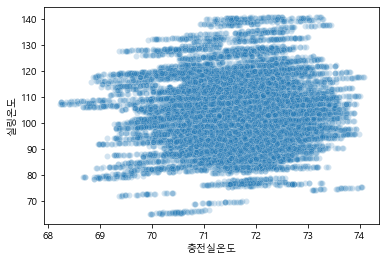

In [7]:
sns.scatterplot(data=df1, x='충전실온도', y='실링온도', alpha=0.2)

<AxesSubplot:xlabel='충전실온도', ylabel='쿠킹스팀압력'>

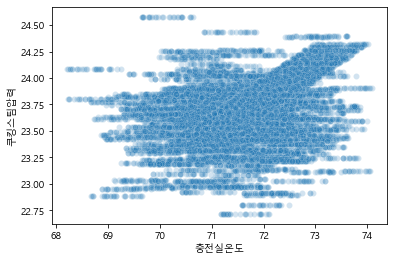

In [8]:
sns.scatterplot(data=df1, x='충전실온도', y='쿠킹스팀압력', alpha=0.2)

<AxesSubplot:xlabel='충전실온도', ylabel='실링압력'>

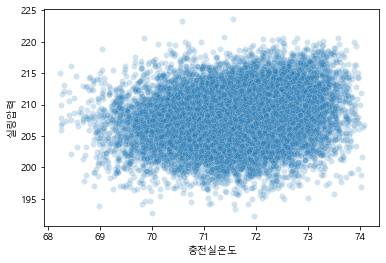

In [9]:
sns.scatterplot(data=df1, x='충전실온도', y='실링압력', alpha=0.2)

<AxesSubplot:xlabel='충전실온도', ylabel='생산시간'>

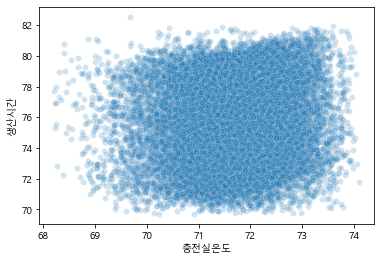

In [10]:
sns.scatterplot(data=df1, x='충전실온도', y='생산시간', alpha=0.2)